In [40]:
# import stuff

import pandas
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler # For performing standardization of data
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [41]:
# load in the data
socialMediaData = pandas.read_csv('./inputs/cleaned_train.csv')
socialMediaData

,Age,Daily_Usage_Time..minutes.,Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Female,Male,Non-binary,Instagram,...,LinkedIn,Whatsapp,Telegram,Snapchat,Happiness,Anger,Neutral,Anxiety,Boredom,Sadness
0,25,120,3,45,10,12,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,30,90,5,20,25,30,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22,60,2,15,5,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,28,200,8,100,30,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,45,1,5,2,10,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,85,4,35,18,18,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
996,22,70,1,14,6,10,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
997,35,110,3,50,25,25,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
998,28,60,2,18,8,18,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# split the data into X and Y and training and testing

Ycolumns = ['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness']

X = socialMediaData.drop(Ycolumns, axis=1)
Y = socialMediaData[Ycolumns]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42) # random state makes the split deterministic. if random state = None, running the code multiple times will give different training and test sets

Y.sum(axis=0) # Display the number of each class in the dataset to check for over-inflation of a particular class.

Happiness    200
Anger        130
Neutral      200
Anxiety      170
Boredom      140
Sadness      160
dtype: int64

In [ ]:
# Standardization of data attempt
# Note: Standardization caused high accuracy results that likely don't reflect the quality of the model
# and likely instead represent overfitting of the dataset.

# Performing standardization of the data
data_scaler = StandardScaler()

# Finding the mean and std. deviation of the train data
data_scaler.fit(Xtrain)

# # Performing the standardization on our data
Xtrain_standardized = data_scaler.transform(Xtrain)
Xtest_standardized = data_scaler.transform(Xtest)

print(f'Standardized X Training Data: {Xtrain_standardized}')
print(f'Standardized X Testing Data: {Xtest_standardized}')

In [45]:
# build the KNN model

# initialize the model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') # pick k value. 4 or 5 works good. more than 5 is overfitting
# wrap the model in a multiple model so it can handle multiple response variables
multipleKnn = MultiOutputClassifier(knn)
# run model on training data
multipleKnn.fit(Xtrain, Ytrain)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance'))

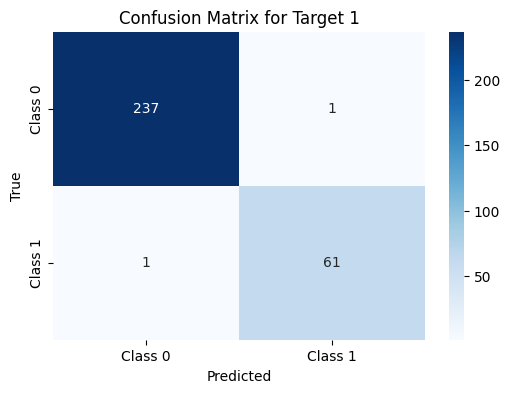

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


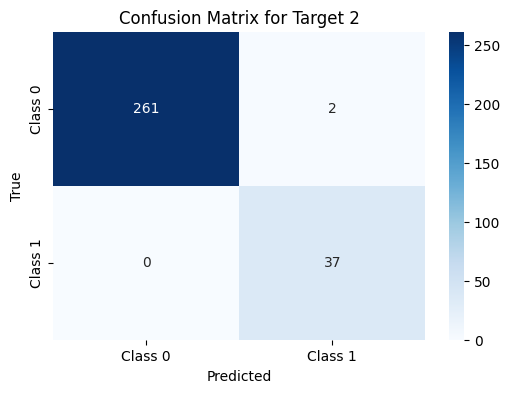

  Accuracy: 0.99
  Precision: 0.95
  Recall: 1.00
  F1 Score: 0.97


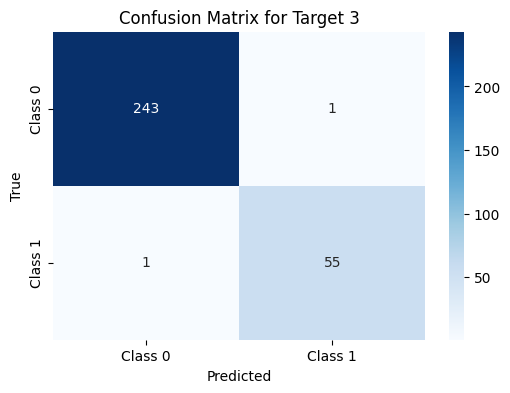

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


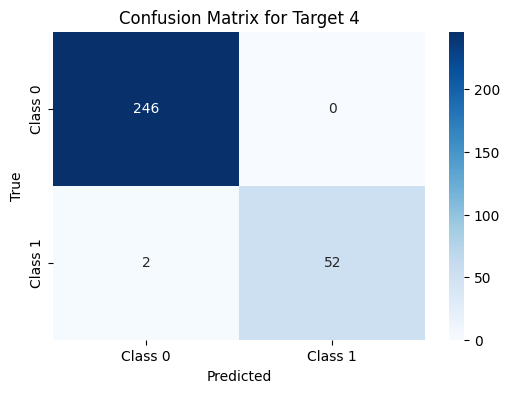

  Accuracy: 0.99
  Precision: 1.00
  Recall: 0.96
  F1 Score: 0.98


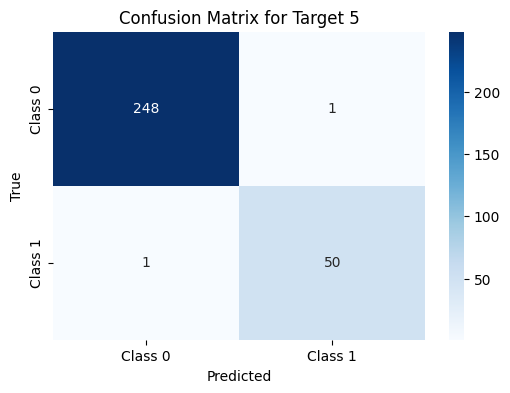

  Accuracy: 0.99
  Precision: 0.98
  Recall: 0.98
  F1 Score: 0.98


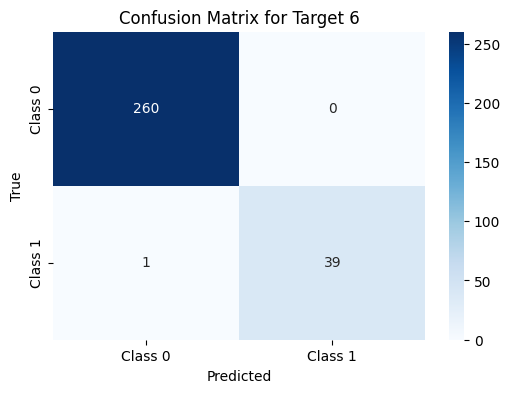

  Accuracy: 1.00
  Precision: 1.00
  Recall: 0.97
  F1 Score: 0.99
Cross-validation accuracy: 0.9742857142857144
Classification report for Happiness:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.98      0.98      0.98        62

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Classification report for Anger:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       263
           1       0.95      1.00      0.97        37

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300



Classification report for Neutral:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1   

In [46]:
# make predictions

Ypredictions = multipleKnn.predict(Xtest)

num_targets = Ytest.shape[1]
for i in range(num_targets):
    cm = confusion_matrix(Ytest.iloc[:, i], Ypredictions[:, i])

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Target {i+1}')
    plt.show()

    accuracy = accuracy_score(Ytest.iloc[:, i], Ypredictions[:, i])
    print(f"  Accuracy: {accuracy:.2f}")

    precision = precision_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  Precision: {precision:.2f}")
    
    recall = recall_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  Recall: {recall:.2f}")
    
    f1 = f1_score(Ytest.iloc[:, i], Ypredictions[:, i], average='binary')
    print(f"  F1 Score: {f1:.2f}")

scores = cross_val_score(multipleKnn, Xtrain, Ytrain, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean()}')

for column in Y.columns:
    print(f"Classification report for {column}:")
    print(classification_report(Ytest[column], Ypredictions[:, Y.columns.get_loc(column)]))
    print("\n")

    

In [39]:
# Export our trained model so that we can load it and use it later.
joblib.dump(multipleKnn, "./social-media-knn-model.pkl")

['./social-media-knn-model.pkl']